In [1]:
## Inicial Code
# Libs 
import pandas as pd
import numpy as np

# Graphs Libs
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas config
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Matplotlib config
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# Data Exploration

In [2]:
base_dados = pd.read_csv('house_data.csv')
base_dados.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
## Drop columns
base_dados.drop(columns = ['fire insurance (R$)','total (R$)'],inplace = True)

In [4]:
## Column filter

colunas_numericas = base_dados.columns[base_dados.dtypes != object]
colunas_categoricas = base_dados.columns[base_dados.dtypes == object]

In [5]:
base_dados['city'].value_counts(normalize = True)*100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [6]:
## Analysis

for colunas in colunas_categoricas:
    analise = base_dados[colunas].value_counts(normalize = True)*100
    
    print(colunas ,'\n', analise,'\n',)

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [7]:
## Correction floor
base_dados.loc[base_dados['floor'] =='301']
base_dados.iloc[2562,5] = 30

In [8]:
## Correction '-'
base_dados['floor'] = base_dados['floor'].apply(lambda registro: 0 if registro == '-' else registro)
base_dados['floor'] = pd.to_numeric(base_dados['floor'])

In [9]:
## floor to numeric
base_dados.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35


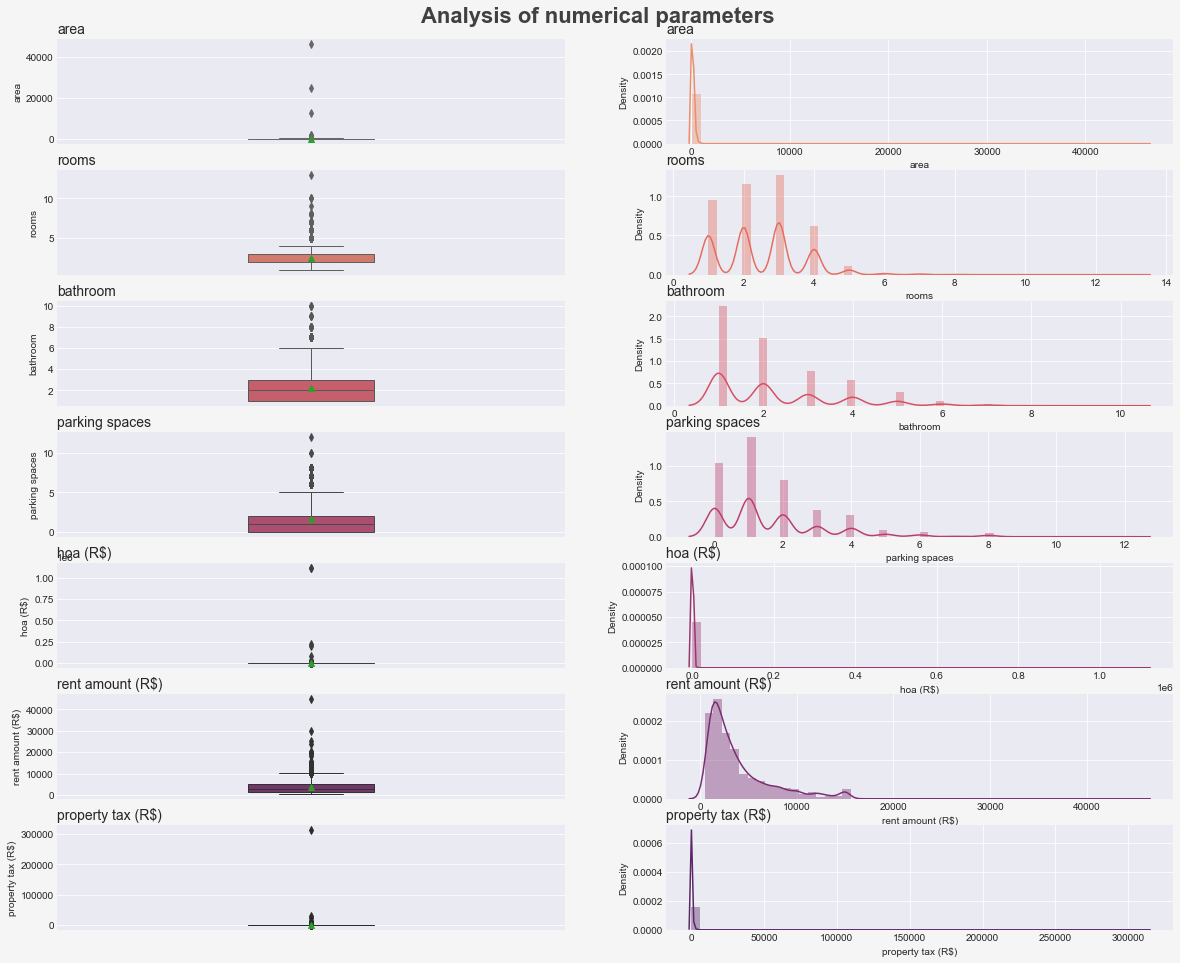

In [10]:
## grid

figura, eixo = plt.subplots(figsize = (20,15))

#background color

cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

# color palette
paleta_cores = sns.color_palette('flare', len(colunas_numericas)*2)

#tittle
plt.suptitle('Analysis of numerical parameters', fontsize=22, color='#404040', fontweight=600 )

# Structure
Linhas = 7 # (numeric)
Colunas = 2 #( Boxplot - Distplot)
Posicao = 1 # inicial position for the grid

for coluna in colunas_numericas:
    #plot box-plot
    plt.subplot(Linhas,Colunas,Posicao)
    
    sns.boxplot(data = base_dados,y=coluna, showmeans = True, saturation=0.75, 
              linewidth=1, color=paleta_cores[Posicao], width=0.25)
    
    Posicao += 1
    
    # Tittle
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )
    
    # plot dis-plot
    plt.subplot(Linhas,Colunas,Posicao)
    
    # Tittle
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )
    
    # Plot
    sns.distplot( base_dados[coluna], color=paleta_cores[ Posicao - 1 ] )
    
    Posicao += 1

# Grid adjustment
plt.subplots_adjust( top=0.95, hspace=0.25 )

In [11]:
base_dados.loc[base_dados['area']<=10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

# Data Treatment

In [12]:

## Column adjustment: categorical --> numeric
base_dados['animal'] = base_dados['animal'].map({'acept':1 ,'not acept':0})
base_dados['furniture'] = base_dados['furniture'].map({'furnished':1 ,'not furnished':0})

In [13]:
## filter sao paulo
filtro_sp = base_dados.loc[base_dados['city'] == 'São Paulo']
filtro_sp

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735
...,...,...,...,...,...,...,...,...,...,...,...
10683,São Paulo,280,4,4,2,5,1,0,4200,4000,1042
10685,São Paulo,83,3,2,2,11,1,0,888,7521,221
10686,São Paulo,150,3,3,2,8,0,1,0,13500,0
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973


In [14]:
# Removing city column.

filtro_sp.drop(columns = 'city',inplace = True)

In [15]:
## Data selecting
caracteristicas = filtro_sp.drop(columns = 'rent amount (R$)')
previsor = filtro_sp['rent amount (R$)']

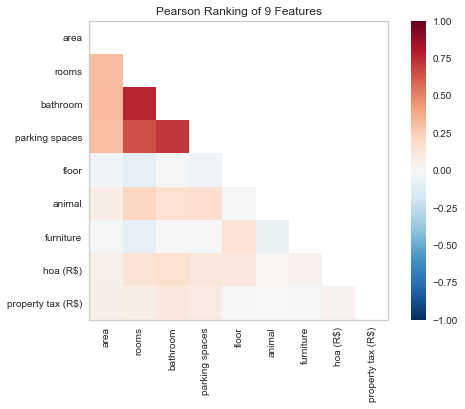

In [16]:
## Correlation verification

## yellow brick

from yellowbrick.features import Rank2D

## method

correlacao = Rank2D(algoritimo = 'pearson')

correlacao.fit(caracteristicas,previsor)
correlacao.transform(caracteristicas)
correlacao.show();

In [17]:

from sklearn.model_selection import train_test_split

# Data Selection

x_treino,x_teste,y_treino,y_teste = train_test_split(
caracteristicas,previsor,test_size = 0.2, random_state = 10)

In [18]:
# most important features

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [19]:
def selecao_features(x_treino,y_treino):
    #Selection configuration
    selecao = SelectKBest(score_func = mutual_info_regression, k='all' )
    
    #fit best model
    selecao.fit(x_treino,y_treino)
    
    return selecao

In [20]:
scores = selecao_features(x_treino,y_treino)

# Analysis of correlations

for Posicao,scores in enumerate(scores.scores_):
    print(f'{x_treino.columns[Posicao]}:{scores}')

area:0.08675836797110303
rooms:0.2543071550612068
bathroom:0.31685355408725036
parking spaces:0.24222269403149932
floor:0.030124830032486116
animal:0.03315521838484248
furniture:0.028983899616733755
hoa (R$):0.0690631594438913
property tax (R$):0.1518919813371684


# Model creation

In [23]:
from sklearn.ensemble import RandomForestRegressor


Modelo_Floresta = RandomForestRegressor( max_depth=5 )
# Fitting
Modelo_Floresta.fit(x_treino, y_treino )

RandomForestRegressor(max_depth=5)

In [25]:
# Performance test
Previsoes = Modelo_Floresta.predict( x_teste )

# Function to evaluate
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: { sqrt(mean_squared_error( y_teste, Previsoes ) ) } ')
print(f'Score: { r2_score( y_teste, Previsoes ) } ')

RMSE: 2458.156450642807 
Score: 0.5626685411751515 


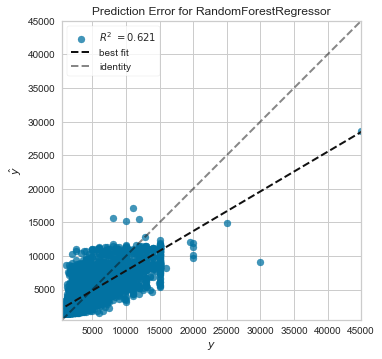

In [26]:
# Yellowbrick
from yellowbrick.regressor import PredictionError

#instantiate
erro_modelo = PredictionError( Modelo_Floresta )

#Fitting
erro_modelo.fit(x_treino,y_treino)
erro_modelo.score(x_treino,y_treino)
erro_modelo.show();


## Exporting

In [70]:
# Exporting the model
import joblib

# Function
joblib.dump( Modelo_Floresta, 'Modelo_Floresta_Aleatorio_v100.pkl')

['Modelo_Floresta_Aleatorio_v100.pkl']